In [140]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import itertools
import torch
import pandas as pd
from more_itertools import locate
from torch_geometric.utils import to_dense_adj

def concat_lists(lists):
        return list(itertools.chain.from_iterable(lists))

def pd_to_adj_matrix(df:pd.DataFrame, columns:list, weights:list):
    adj, edgeWeights = np.zeros([2,0]), []
    for i, column in enumerate(columns):
        edgeDest = [list(locate(df[column], lambda x: x==i)) for i in df[column]]
        edgeOrig = concat_lists([list(np.ones(len(x)).astype(int)*i) for i, x in enumerate(edgeDest)])
        edgeDest = concat_lists(edgeDest)
        nonSelf = np.where([val!=edgeDest[i] for i, val in enumerate(edgeOrig)])[0]
        adj = np.concatenate((adj,np.array([np.take(edgeOrig,nonSelf), np.take(edgeDest,nonSelf)])),axis=-1)
        edgeWeights = edgeWeights + [weights[i]]*len(edgeDest)
    return adj.astype(int), edgeWeights

def draw_graph(nodes,edges,edgeWeights,nodeType):
    graph = nx.Graph()
    edges = zip(edges[0], edges[1], edgeWeights)
    graph.add_weighted_edges_from(edges)
    graph.add_nodes_from(nodes)
    pos = nx.kamada_kawai_layout(graph)
    fig, ax = plt.subplots(1,1,figsize=[15,15])
    nx.draw_networkx(graph,pos, with_labels=False,node_size=50,width=0.1, node_color=nodeType, cmap=plt.cm.coolwarm)

In [141]:
class IHSData(object):
    def __init__(self):
        self.productFile = "C:/Users\lukec\OneDrive - University of Cambridge\PhD\Data\IHS\Ethylene\products.csv"
        self.materialFile = "C:/Users\lukec\OneDrive - University of Cambridge\PhD\Data\IHS\Ethylene\materials.csv"
        self.products = pd.read_csv(self.productFile,index_col=0).reset_index(drop=True)
        self.materials = pd.read_csv(self.materialFile,index_col=0).reset_index(drop=True)
        self.columns = ['Geography', 'Process']
        self.weights = [0.1,1]
        self.adjMatrix, self.edgeWeights = pd_to_adj_matrix(self.products,self.columns,self.weights)
        self.nodeTypes = self.products['Base Capacity (MM unit/year)']

In [142]:
data = IHSData()

In [143]:
data.products

,Code,Geography,Data Version,Research Year,Process,Unit,Base Capacity (MM unit/year),Investment (MM US$),Type,Name,...,Fixed Costs,"Overhead + Tax, Ins.",Plant Cash Cost,Depreciation,Plant Gate Costs,"G&A, Sales, Res.",Production Cost,ROI (15%),Product Value,Product Price
0,1M-981,"United States, Gulf Coast",2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,884.905431,Product,ETHYLENE,...,5.893464,6.625514,34.643831,22.118850,56.762680,2.781679,59.544360,33.178274,92.722634,100.420560
1,2M-981,Germany,2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,937.999757,Product,ETHYLENE,...,6.556605,7.251622,90.496201,23.445981,113.942182,4.611685,118.553867,35.168971,153.722838,135.826800
2,3M-981,Japan,2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,778.716780,Product,ETHYLENE,...,5.141040,5.321030,106.393440,19.464588,125.858028,4.795513,130.653541,29.196881,159.850422,100.354422
3,4M-981,"China, Shanghai",2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,584.037585,Product,ETHYLENE,...,3.742141,3.454213,80.661070,14.598441,95.259511,3.623418,98.882928,21.897661,120.780589,97.532505
4,1M-1595,"United States, Gulf Coast",2021 Q3,2014.0,ETHYLENE FROM 100% ETHANE,KG,1499.998216,2603.121527,Product,ETHYLENE,...,5.280392,5.692002,32.993959,17.354164,50.348123,2.362249,52.710372,26.031246,78.741618,100.420560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,4M-1602,"China, Shanghai",2021 Q3,2014.0,METHANOL TO OLEFINS BY THE DMTO-II PROCESS,KG,298.010187,394.934144,Product,ETHYLENE,...,3.570702,3.305171,104.954207,13.252371,118.206578,1.394799,119.601377,19.878556,139.479933,97.532505
240,1M-1603,"United States, Gulf Coast",2021 Q3,2014.0,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,KG,288.938340,604.837579,Product,ETHYLENE,...,6.383301,6.666587,41.930773,20.933102,62.863875,0.952157,63.816032,31.399653,95.215685,100.420560
241,2M-1603,Germany,2021 Q3,2014.0,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,KG,288.938340,641.127834,Product,ETHYLENE,...,7.194883,7.383074,104.769784,22.189088,126.958872,1.618611,128.577483,33.283632,161.861116,135.826800
242,3M-1603,Japan,2021 Q3,2014.0,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,KG,288.938340,532.257070,Product,ETHYLENE,...,5.554709,5.286335,129.071071,18.421130,147.492201,1.768928,149.261130,27.631695,176.892824,100.354422


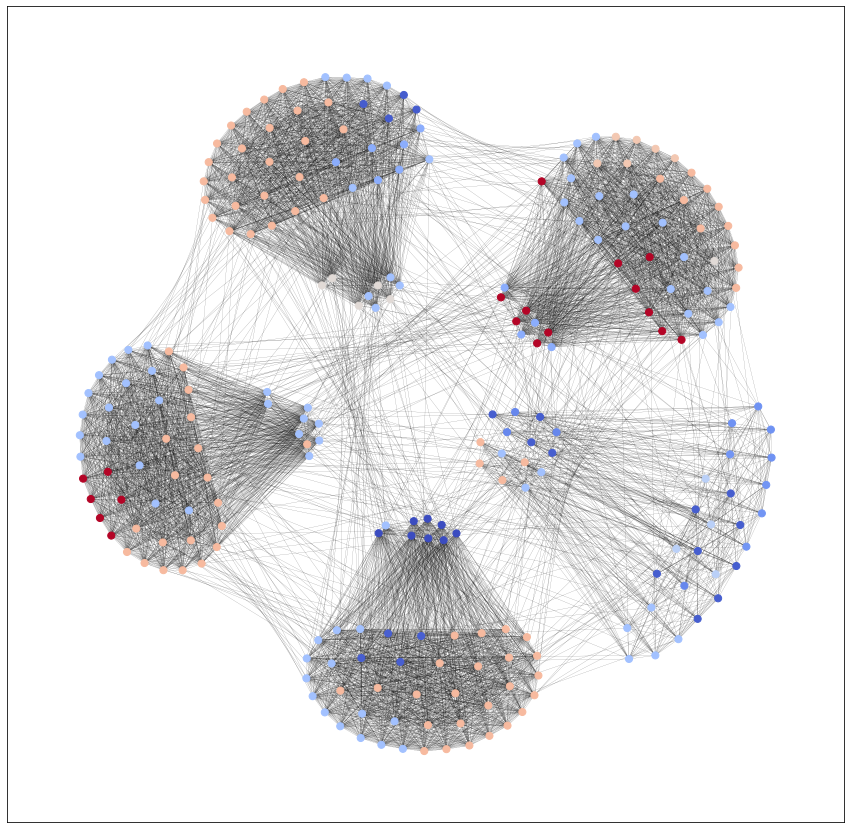

In [144]:
draw_graph(data.products.index,data.adjMatrix,data.edgeWeights,data.nodeTypes)

In [147]:
data.products

,Code,Geography,Data Version,Research Year,Process,Unit,Base Capacity (MM unit/year),Investment (MM US$),Type,Name,...,Fixed Costs,"Overhead + Tax, Ins.",Plant Cash Cost,Depreciation,Plant Gate Costs,"G&A, Sales, Res.",Production Cost,ROI (15%),Product Value,Product Price
0,1M-981,"United States, Gulf Coast",2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,884.905431,Product,ETHYLENE,...,5.893464,6.625514,34.643831,22.118850,56.762680,2.781679,59.544360,33.178274,92.722634,100.420560
1,2M-981,Germany,2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,937.999757,Product,ETHYLENE,...,6.556605,7.251622,90.496201,23.445981,113.942182,4.611685,118.553867,35.168971,153.722838,135.826800
2,3M-981,Japan,2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,778.716780,Product,ETHYLENE,...,5.141040,5.321030,106.393440,19.464588,125.858028,4.795513,130.653541,29.196881,159.850422,100.354422
3,4M-981,"China, Shanghai",2021 Q3,2002.0,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,KG,400.068470,584.037585,Product,ETHYLENE,...,3.742141,3.454213,80.661070,14.598441,95.259511,3.623418,98.882928,21.897661,120.780589,97.532505
4,1M-1595,"United States, Gulf Coast",2021 Q3,2014.0,ETHYLENE FROM 100% ETHANE,KG,1499.998216,2603.121527,Product,ETHYLENE,...,5.280392,5.692002,32.993959,17.354164,50.348123,2.362249,52.710372,26.031246,78.741618,100.420560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,4M-1602,"China, Shanghai",2021 Q3,2014.0,METHANOL TO OLEFINS BY THE DMTO-II PROCESS,KG,298.010187,394.934144,Product,ETHYLENE,...,3.570702,3.305171,104.954207,13.252371,118.206578,1.394799,119.601377,19.878556,139.479933,97.532505
240,1M-1603,"United States, Gulf Coast",2021 Q3,2014.0,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,KG,288.938340,604.837579,Product,ETHYLENE,...,6.383301,6.666587,41.930773,20.933102,62.863875,0.952157,63.816032,31.399653,95.215685,100.420560
241,2M-1603,Germany,2021 Q3,2014.0,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,KG,288.938340,641.127834,Product,ETHYLENE,...,7.194883,7.383074,104.769784,22.189088,126.958872,1.618611,128.577483,33.283632,161.861116,135.826800
242,3M-1603,Japan,2021 Q3,2014.0,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,KG,288.938340,532.257070,Product,ETHYLENE,...,5.554709,5.286335,129.071071,18.421130,147.492201,1.768928,149.261130,27.631695,176.892824,100.354422


In [146]:
data.materials

,Code,Data Version,Source,Target,Research Year,Geography,Plant capacity,Capacity unit,Product,Value,...,Product fixed costs,"Product Overhead + Tax, Ins.",Product Plant Cash Cost,Product Depreciation,Product Plant Gate Costs,"Product G&A, Sales, Res.",Production Cost,Product ROI (15%),Product Value,Product Price
0,1M-981,2021 Q3,CATALYST,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,2002.0,"United States, Gulf Coast",400.06847,MM KG/yr,ETHYLENE,NaN,...,5.893464,6.625514,34.643831,22.118850,56.76268,2.781679,59.544360,33.178274,92.722634,100.420560
1,1M-981,2021 Q3,CAUSTIC SODA (50%),ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,2002.0,"United States, Gulf Coast",400.06847,MM KG/yr,ETHYLENE,0.006260,...,5.893464,6.625514,34.643831,22.118850,56.76268,2.781679,59.544360,33.178274,92.722634,100.420560
2,1M-981,2021 Q3,"METHANOL, CRUDE",ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,2002.0,"United States, Gulf Coast",400.06847,MM KG/yr,ETHYLENE,5.941383,...,5.893464,6.625514,34.643831,22.118850,56.76268,2.781679,59.544360,33.178274,92.722634,100.420560
3,1M-981,2021 Q3,C4-C5 MIXTURE,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,2002.0,"United States, Gulf Coast",400.06847,MM KG/yr,ETHYLENE,-0.436700,...,5.893464,6.625514,34.643831,22.118850,56.76268,2.781679,59.544360,33.178274,92.722634,100.420560
4,1M-981,2021 Q3,ETHANE-RICH GAS,ETHYLENE BY THE UOP/HYDRO METHANOL TO OLEFINS ...,2002.0,"United States, Gulf Coast",400.06847,MM KG/yr,ETHYLENE,-0.031340,...,5.893464,6.625514,34.643831,22.118850,56.76268,2.781679,59.544360,33.178274,92.722634,100.420560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,4M-1603,2021 Q3,PROPANE-RICH GAS,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,2014.0,"China, Shanghai",288.93834,MM KG/yr,ETHYLENE,-0.027350,...,4.008685,3.580103,94.094853,13.815847,107.91070,1.299338,109.210038,20.723771,129.933810,97.532505
2918,4M-1603,2021 Q3,"PROPYLENE, CHEM GRADE",METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,2014.0,"China, Shanghai",288.93834,MM KG/yr,ETHYLENE,-1.111190,...,4.008685,3.580103,94.094853,13.815847,107.91070,1.299338,109.210038,20.723771,129.933810,97.532505
2919,4M-1603,2021 Q3,COOLING WATER,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,2014.0,"China, Shanghai",288.93834,MM KG/yr,ETHYLENE,262.880116,...,4.008685,3.580103,94.094853,13.815847,107.91070,1.299338,109.210038,20.723771,129.933810,97.532505
2920,4M-1603,2021 Q3,ELECTRICITY,METHANOL TO OLEFINS BY UOP ADVANCED MTO PROCESS,2014.0,"China, Shanghai",288.93834,MM KG/yr,ETHYLENE,108.026508,...,4.008685,3.580103,94.094853,13.815847,107.91070,1.299338,109.210038,20.723771,129.933810,97.532505
